In [1]:
import math

import jupyter_cadquery as jcq
from jupyter_cadquery.replay import show

from build123d import *

Overwriting auto display for cadquery Workplane and Shape


In [2]:
jcq.set_defaults(
    control="orbit",
    axes=True,
    axes0=True,
    grid=(True, False, False),
    glass=True,
    theme="browser",
)

In [3]:
%%html
<style>
/* Fix widget background color in VS Code */
.cell-output-ipywidget-background {
   background-color: transparent !important;
}
</style>

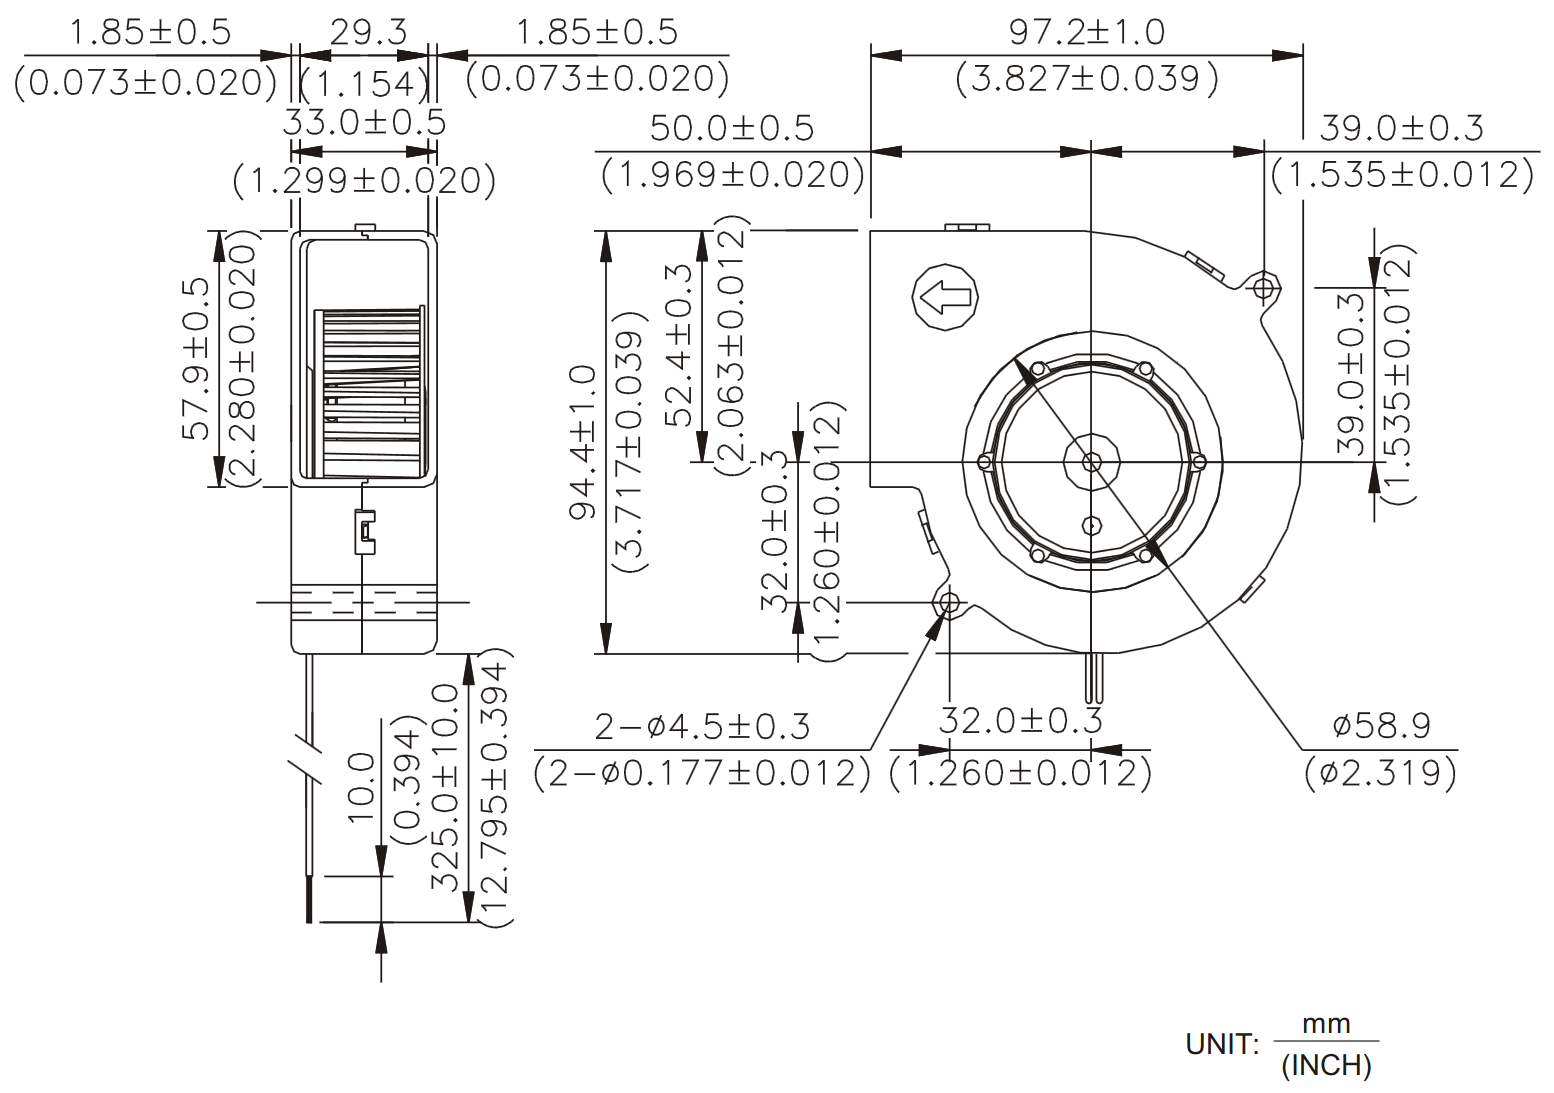
<https://www.mouser.com/datasheet/2/632/BFB97x94x33mm-519309.pdf>

In [4]:
fan_width = 94.4
fan_height = 97.2
hole_pos = [
    (fan_width - 52.4 + 39, fan_height - 50 - 39),
    (fan_width - 52.4 - 32, fan_height - 50 + 32),
]
screw_hole_n_r = 3 / 2 - 0.2
screw_hole_r = 3 / 2 + 0.2
screw_head_r = 6 / 2
screw_head_h = 4
thickness = 6
screw_min_thickness = 2.5

with BuildPart() as base:
    with BuildSketch(Plane.XZ):
        with BuildLine():
            l1 = Line((0, 0), (0, fan_height - 10))
            l2 = Line(l1 @ 1, (20, fan_height - 10))
            l3 = Line(l2 @ 1, (fan_width, 20))
            l4 = Line(l3 @ 1, (fan_width, 0))
            Line(l1 @ 0, l4 @ 1)
        make_face()
        offset(amount=-15, mode=Mode.SUBTRACT)
    extrude(amount=-thickness)
    # Box(fan_width, thickness, fan_height-10, align=(Align.MIN, Align.MIN, Align.MIN))
    with BuildSketch(Plane.XZ):
        with Locations(*hole_pos):
            Circle(screw_hole_n_r)
    extrude(amount=thickness * 2, both=True, mode=Mode.SUBTRACT)
    with Locations((0, thickness, 0)):
        b = Box(fan_width, 20, thickness, align=(Align.MIN, Align.MAX, Align.MAX))
    with Locations(b.faces().sort_by(Axis.Z).last):
        with Locations((-fan_width / 2 + 10,0), (fan_width / 2 - 10, 0)):
            CounterBoreHole(
                screw_hole_r, screw_head_r, thickness - screw_min_thickness,
            )

show(base)
base.part.export_step("/tmp/base.step")

CadViewerWidget(anchor=None, cad_width=800, glass=True, height=600, pinning=False, theme='browser', title=None…


*******************************************************************
******        Statistics on Transfer (Write)                 ******

*******************************************************************
******        Transfer Mode = 0  I.E.  As Is       ******
******        Transferring Shape, ShapeType = 0                      ******
** WorkSession : Sending all data
 Step File Name : /tmp/base.step(1370 ents)  Write  Done


<IFSelect_ReturnStatus.IFSelect_RetDone: 1>

In [47]:
outlet = (33, 57.9)
box_size = (outlet[0], 95, 95)
filter_thickness = 3

with BuildPart() as filter_box:
    with BuildSketch():
        Rectangle(box_size[0], box_size[1],align=(Align.CENTER,Align.MIN))
        offset(amount=filter_thickness)
    extrude(amount=10+40-10+box_size[2])
    with BuildSketch():
        Rectangle(outlet[0], outlet[1],align=(Align.CENTER,Align.MIN))
    bottom = extrude(amount=10, mode=Mode.SUBTRACT)
    with BuildSketch(Plane.XY.offset(40)):
        Rectangle(box_size[0], box_size[1],align=(Align.CENTER,Align.MIN))
    top = extrude(amount=box_size[2], mode=Mode.SUBTRACT)
    loft([bottom.faces().sort_by(Axis.Z).last, top.faces().sort_by(Axis.Z).first], mode=Mode.SUBTRACT)
    paths = bottom.faces().sort_by(Axis.Z).last.edges()
    for path in paths:
        with BuildSketch(Plane(origin=path@0, z_dir=path%0)) as c:
                Circle(1)
        sweep(path=path)
    paths = top.faces().sort_by(Axis.Z).first.edges()
    for path in paths:
        with BuildSketch(Plane(origin=path@0, z_dir=path%0)) as c:
                Circle(1)
        sweep(path=path)
    for face in filter_box.faces().filter_by(Axis.Z):
        fillet(face.outer_wire().edges(), filter_thickness/2)

show(filter_box)
filter_box.part.export_step("/tmp/filter_box.step")

CadViewerWidget(anchor=None, cad_width=800, glass=True, height=600, pinning=False, theme='browser', title=None…


*******************************************************************
******        Statistics on Transfer (Write)                 ******

*******************************************************************
******        Transfer Mode = 0  I.E.  As Is       ******
******        Transferring Shape, ShapeType = 0                      ******
** WorkSession : Sending all data
 Step File Name : /tmp/filter_box.step(3106 ents)  Write  Done


<IFSelect_ReturnStatus.IFSelect_RetDone: 1>

In [48]:
with BuildPart() as grid:
    Box(box_size[0]-0.2,box_size[1]-0.2, 6)
show(grid)
grid.part.export_step("/tmp/grid.step")

CadViewerWidget(anchor=None, cad_width=800, glass=True, height=600, pinning=False, theme='browser', title=None…


*******************************************************************
******        Statistics on Transfer (Write)                 ******

*******************************************************************
******        Transfer Mode = 0  I.E.  As Is       ******
******        Transferring Shape, ShapeType = 0                      ******
** WorkSession : Sending all data
 Step File Name : /tmp/grid.step(350 ents)  Write  Done


<IFSelect_ReturnStatus.IFSelect_RetDone: 1>